<a href="https://colab.research.google.com/github/pradg73/assign/blob/master/mymakemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
import urllib
#words = urllib.request.urlopen('https://raw.githubusercontent.com/karpathy/nn-zero-to-hero/815b3dda3fa630e8a7fbce063c6ec1807f9a6ce2/lectures/makemore/names.txt').read().decode('utf8').splitlines()
#words[:8]
url='https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv'
words = urllib.request.urlopen(url).read().decode('utf8').splitlines()
words = [l.split(',')[0].split(' ')[0] for l in words]
words = words[1:]
words[:8]

['barjraj', 'ramdin', 'sharat', 'birender', 'amit', 'kushal', 'kasid', 'shiv']

In [ ]:
atoi = {'*': 0}
itoa = {0 : '*'}
i = 1
for c in sorted(set(''.join([w for w in words]))):
  atoi[c] = i
  itoa[i] = c
  i = i+1
atoi

{'*': 0,
 '"': 1,
 '&': 2,
 '(': 3,
 ')': 4,
 '-': 5,
 '.': 6,
 '/': 7,
 '0': 8,
 '1': 9,
 '5': 10,
 '7': 11,
 '8': 12,
 '9': 13,
 '@': 14,
 '[': 15,
 '`': 16,
 'a': 17,
 'b': 18,
 'c': 19,
 'd': 20,
 'e': 21,
 'f': 22,
 'g': 23,
 'h': 24,
 'i': 25,
 'j': 26,
 'k': 27,
 'l': 28,
 'm': 29,
 'n': 30,
 'o': 31,
 'p': 32,
 'q': 33,
 'r': 34,
 's': 35,
 't': 36,
 'u': 37,
 'v': 38,
 'w': 39,
 'x': 40,
 'y': 41,
 'z': 42,
 'ं': 43,
 'अ': 44,
 'आ': 45,
 'उ': 46,
 'क': 47,
 'ख': 48,
 'ग': 49,
 'च': 50,
 'छ': 51,
 'ज': 52,
 'ण': 53,
 'त': 54,
 'द': 55,
 'ध': 56,
 'न': 57,
 'प': 58,
 'फ': 59,
 'म': 60,
 'य': 61,
 'र': 62,
 'ल': 63,
 'व': 64,
 'श': 65,
 'ष': 66,
 'स': 67,
 'ह': 68,
 '़': 69,
 'ा': 70,
 'ि': 71,
 'ी': 72,
 'ु': 73,
 'ू': 74,
 'े': 75,
 'ो': 76,
 '्': 77,
 '\u200d': 78}

In [ ]:
X = []
Y = []

for w in words:
  prefix =[0]*3
  for c in w + '*':
    X.append(prefix);
    Y.append(atoi[c])
    prefix = prefix[1:] + [atoi[c]]
X = torch.tensor(X)
Y = torch.tensor(Y)

#for v in zip(X,Y):
#  print(v)

In [ ]:
X.shape

torch.Size([101075, 3])

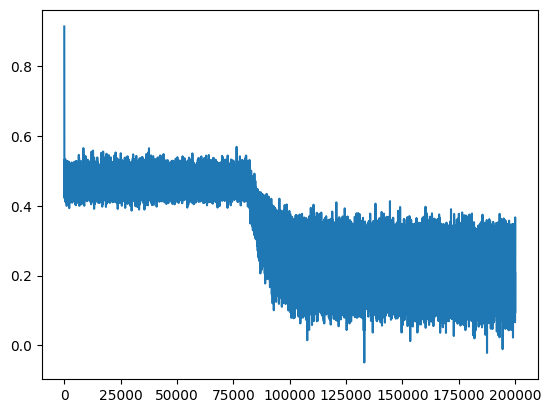

In [ ]:
C = torch.rand(len(atoi),10)
vocabsize = len(atoi)
W1 = torch.rand(30,100)
b1 = torch.rand(100)
W2 = torch.rand(100,vocabsize)
b2 = torch.rand(vocabsize)
params = [C,W1,b1,W2,b2]
for p in params:
  p.requires_grad = True
stepi = []
lossi = []
for i in range(200000):
  xi = torch.randint(low=0, high=X.shape[0], size=(64,))
  embed = C[X[xi]]
  h = torch.tanh(embed.view(-1,30)@W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[xi])
  stepi.append(i)
  lossi.append(loss.log10().item())
  for p in params:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in params:
    p.data += -lr * p.grad
plt.plot(stepi,lossi)

In [ ]:
for _ in range(20):
    out = []
    context = [0] * 3 # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      #ix = torch.argmax(probs).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    print(''.join(itoa[i] for i in out))


ash*
shaveer*
tarbirender*
lopuhender*
kev*
ansinay*
kishwrash*
minam*
ashmanil*
md*
hoopil*
ajayan*
haribh*
gur*
jatish*
susanjeeej*
naveeraja*
so*
ashish*
sunil*
